<a href="https://colab.research.google.com/github/2024S2-ML/.github/blob/main/RegressaoPolinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

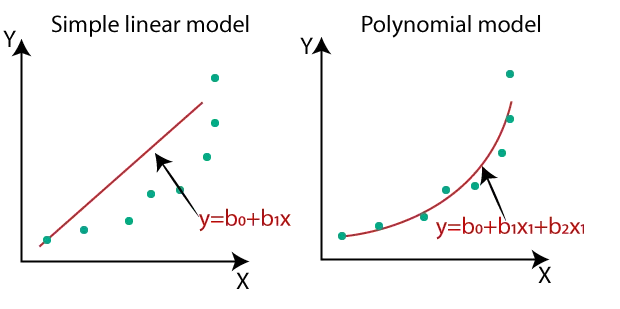

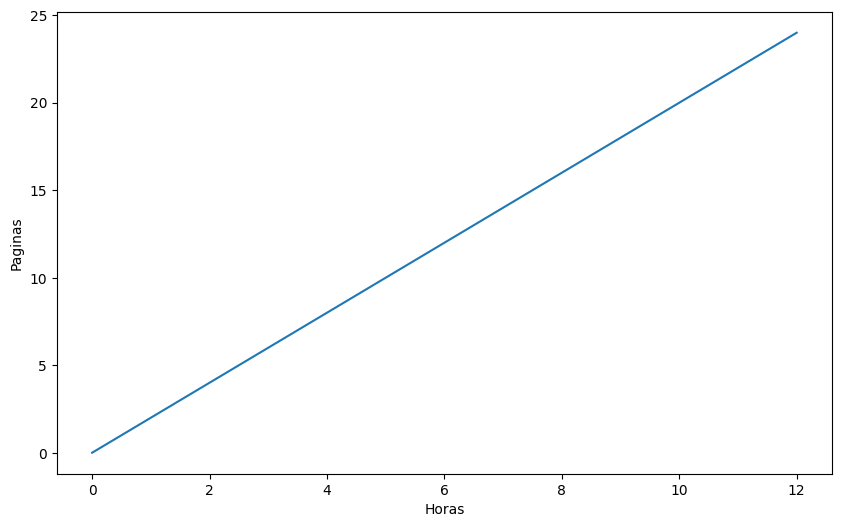

In [1]:
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(1)

horas = np.linspace(0,12,20)
paginas = horas * 2
plt.figure(figsize=(10,6)) # figure size
plt.plot(horas, paginas)
plt.ylabel('Paginas')
plt.xlabel('Horas')
plt.show()

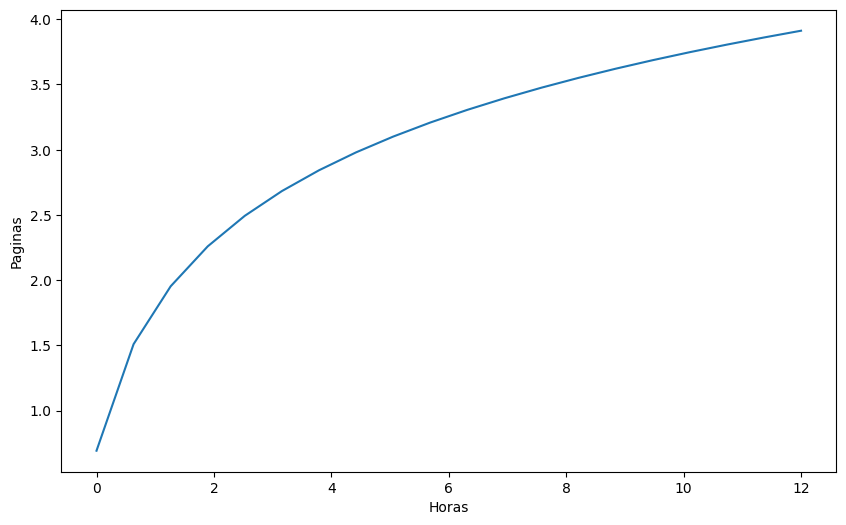

In [2]:
paginas2 = np.log(paginas*2 + 2)
plt.figure(figsize=(10,6)) # figure size
plt.plot(horas, paginas2)
plt.ylabel('Paginas')
plt.xlabel('Horas')
plt.show()

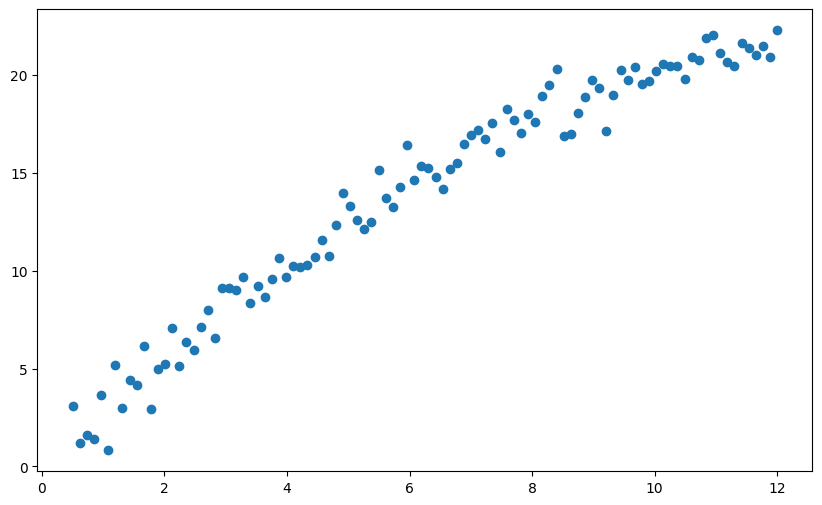

In [3]:
x = np.linspace(.5,12,100)
y = 3*x - 0.1*(x**2) + np.random.normal(0,1,size=x.shape)

plt.figure(figsize=(10,6)) # figure size
plt.scatter(x, y)
plt.show()

In [4]:
import pandas as pd

# criamos a variável x^2
dados = pd.DataFrame({
    'y': y,
    'x': x,
    'x^2': x**2})

dados.head()

,y,x,x^2
0,3.099345,0.500000,0.250000
1,1.198763,0.616162,0.379655
2,1.615168,0.732323,0.536297
3,1.400493,0.848485,0.719927
4,3.666293,0.964646,0.930543


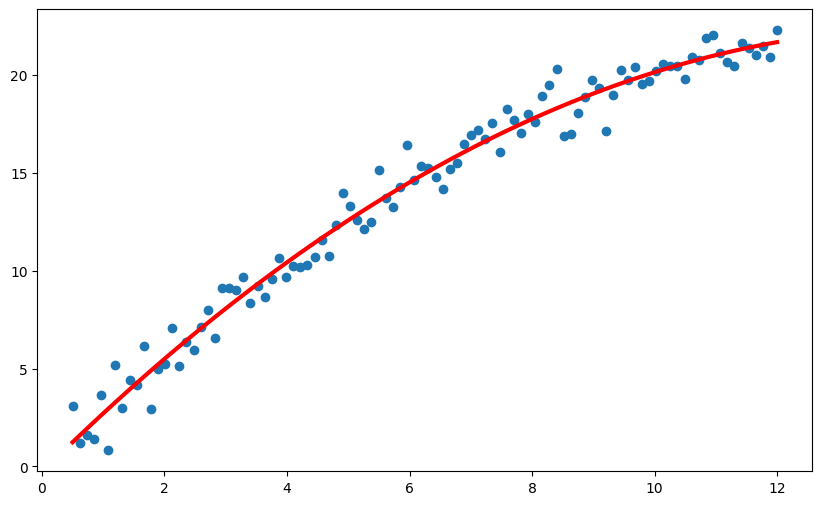

In [5]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

regr.fit(dados[['x', 'x^2']], dados[['y']])
line = regr.predict(dados[['x', 'x^2']])

plt.figure(figsize=(10,6)) # figure size
plt.plot(x, line, c='r', lw=3)
plt.scatter(x, y)
plt.show()


In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import numpy as np
np.random.seed(3)
# scale: Standard deviation (spread or “width”) of the distribution. Must be non-negative.
scale=0.15
# loc: Mean (“centre”) of the distribution.
loc=0

# Função de crescimento do PIB
def f(x):
    return np.sin(x/1.5) + x*.1 + np.random.normal(loc, scale, size=x.shape)

In [7]:
# Gera 100 pontos do eixo x (0 a 15)
x_plot = np.linspace(0, 15, 100)
x = np.linspace(0, 15, 100)

# Embaralha os dados
rng = np.random.RandomState(0)
rng.shuffle(x)

# usa um subset para treino (10 dados)
x_train = np.sort(x[:10])
# usa um subset para teste (90 dados)
x_test = np.sort(x[10:])


# gera a função de crescimento do PIB (treino)
y = f(x_train)
# gera a função de crescimento do PIB (teste)
y_test = f(x_test)

# transforma X em matriz coluna. O mesmo que: X = x_train.reshape(-1,1)
X = x_train[:, np.newaxis]

# o mesmo que: X_plot = x_plot.reshape(-1,1)
X_plot = x_plot[:, np.newaxis]


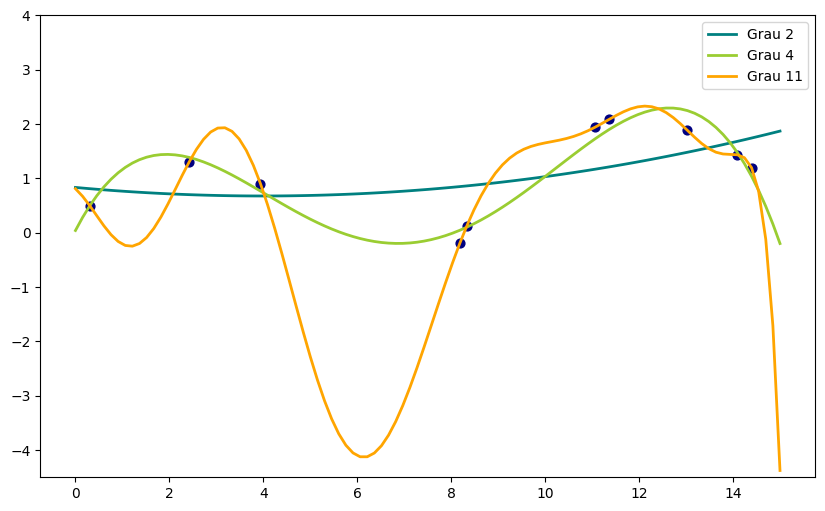

In [8]:
# parâmetros do gráfico
colors = ['teal', 'yellowgreen', 'orange', 'red', 'green']
lw = 2

plt.figure(figsize=(10,6)) # figure size

# ajusta polinômios de graus 2, 4 e 11.
for count, degree in enumerate([2, 4, 11]):

    # cria as variáveis polinomiais e as passa pelo modelo de regressão linear
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)

    # coloca as previsões no gráfico
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw, label="Grau %d" % degree)

plt.scatter(x_train, y, color='navy', s=40, marker='o')
plt.ylim([-4.5,4])
plt.legend(loc='best')
plt.show()

In [10]:
from sklearn.datasets import fetch_openml
import pandas as pd

# Carrega o dataset Boston
boston = fetch_openml(name="boston", version=1, as_frame=True)

# Converte para DataFrame
boston_df = boston.frame


boston_df.describe()

      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
boston.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])